In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import kurtosis,skew

from matplotlib.colors import LinearSegmentedColormap

In [2]:
data = pd.read_csv('Campus Placement.csv')
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### Column Description

-   gender
-   ssc_p -> 10th class percentage
-   ssc_b -> 10th class board
-   hsc_p -> 12th class percentage
-   hsc_b -> 12th class board
-   hsc_s -> 12th class branch
-   degree_p -> undergraduate degree percentage
-   degree_t -> degree branch
-   workex -> work experience
-   etest_p -> Entrance test percentage
-   specialisation -> MBA branch
-   mba_p -> MBA percentage
-   status -> placement status
-   salary -> quoted salary

In [3]:
data.rename(columns={'specialisation':'mba_t'}, inplace=True)

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    215 non-null    object 
 1   ssc_p     215 non-null    float64
 2   ssc_b     215 non-null    object 
 3   hsc_p     215 non-null    float64
 4   hsc_b     215 non-null    object 
 5   hsc_s     215 non-null    object 
 6   degree_p  215 non-null    float64
 7   degree_t  215 non-null    object 
 8   workex    215 non-null    object 
 9   etest_p   215 non-null    float64
 10  mba_t     215 non-null    object 
 11  mba_p     215 non-null    float64
 12  status    215 non-null    object 
 13  salary    148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


1. salary has null values

In [6]:
data.fillna(0,inplace=True)

Filling them with zeros, which is acceptable technically and avoid NaN's

In [7]:
data['salary'].isna().sum()

0

- Feature selection
- Feature scaling
- Balancing
- Removing outliers
- Cross validation(common)

We're going to try out the following models
> - Naive Bayes
    - Independent contribution to the outcome(Less Multicolinearity)
    - If has *Zero Frequency* then apply Laplacian smoothing
    - Normal distribution
    - Feature selection
    - No Feature scaling
    - balancing
    - Remove outliers     
    
> - Logistic Regression
    - Little multicolinearity
    - No Derived or matched attributes
    - Existence of linearity between IV and log odds
    - typically requires a large number of records
    - Feature scaling
    - No Balancing
    - Remove outliers      
    
> - K Nearest Nieghbour
    - Works slow
    - Features should have the same wieghts(If not we have to z score the data)
    - Feature scaling
    - Cross validation
    - balancing
    - Remove outliers
    - Feature selection      
    
> - Linear SVM
    - Feature scaling (Z score)     
    - Removing Outliers
    - Small Dataset
    - hyperparameters
        - reduce ```c``` if it overfits
        - set loss to ```hinge```
        - dual hyperparameter to ```False```
        
> - Decision Tree

In [8]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Removing Outliers 

In [9]:
Manual_analysis = [42, 49, 120, 169, 206, 24, 134, 177, 197, 119, 150]
len(Manual_analysis)

11

In [10]:
def Outlier(dataset,feature):
    shape1 = dataset.shape[0]                                 #taking the shape before removing outliers to keep track of no of outliers
    lst = sorted(dataset[feature])                            #taking a list of sorted values of that column
    
    quantile1, quantile3 = np.percentile(lst,[25,75])         #obtaining 25th and 75th percentile
    iqr_value = quantile3 - quantile1                         #finding inter-quartile value(difference)
    
    #obtaining lower bound and upper bound
    lower_bound_val = quantile1 - (1.5 * iqr_value)
    upper_bound_val = quantile3 + (1.5 * iqr_value)
    
    dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
    dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value
    
    return shape1-(dataset.shape[0])

In [11]:
outlier_free_data = data.copy()
print(outlier_free_data.shape)
for feature in ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']:
    shape1 = Outlier(outlier_free_data,feature)
    print('\n {} has {} outliers'.format(feature, shape1))
outlier_free_data.shape

(215, 14)

 ssc_p has 0 outliers

 hsc_p has 8 outliers

 degree_p has 1 outliers

 etest_p has 0 outliers

 mba_p has 0 outliers

 salary has 1 outliers


/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_1660/3958331934.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(dataset[(dataset[feature] <= lower_bound_val)].index,0,inplace=True) #Dropping the rows having values below lower bound value
/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_1660/3958331934.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset.drop(dataset[(dataset[feature] >= upper_bound_val)].index,0,inplace=True) #Dropping the rows having values above upper bound value


(205, 14)

Comparing the manual index count, we've a difference of only one (i.e..index no: 150)     

So, as for now, we can proceed with above results itself

### Reindexing

In [12]:
outlier_free_data.reset_index(drop=True, inplace = True)
outlier_free_data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
201,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
202,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
203,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


## Feature Scaling (Z Scoring)

In [13]:
out_free_num_data = outlier_free_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p', 'salary']]
out_free_cat_data = outlier_free_data[['workex', 'mba_t', 'degree_t', 'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'status']]

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_df = scaler.fit_transform(out_free_num_data)
standard_df = pd.DataFrame(standard_df, columns =['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p', 'salary'])

In [15]:
standard_df

,ssc_p,degree_p,mba_p,hsc_p,etest_p,salary
0,-0.048543,-1.167746,-0.600208,2.523936,-1.289390,0.517774
1,1.113716,1.580418,0.705618,1.213254,1.122781,0.025359
2,-0.237068,-0.321289,-0.774784,0.144640,0.242147,0.377084
3,-1.085433,-2.014204,-0.490225,-1.510522,-0.447045,-1.381544
4,1.723596,0.990720,-1.176308,0.723947,1.911523,1.608123
...,...,...,...,...,...,...
200,1.233430,1.597347,2.138883,1.592907,1.467377,1.432261
201,-0.896907,0.807321,-1.504510,-0.682941,0.165570,0.552947
202,-0.048543,0.948397,1.306158,0.041192,-0.983083,0.693637
203,0.611296,-1.167746,-0.350565,-0.062255,-0.140737,0.053497


In [16]:
out_fre_stdScl_data = pd.concat([standard_df, out_free_cat_data], axis=1)
out_fre_stdScl_data

,ssc_p,degree_p,mba_p,hsc_p,etest_p,salary,workex,mba_t,degree_t,gender,ssc_b,hsc_b,hsc_s,status
0,-0.048543,-1.167746,-0.600208,2.523936,-1.289390,0.517774,No,Mkt&HR,Sci&Tech,M,Others,Others,Commerce,Placed
1,1.113716,1.580418,0.705618,1.213254,1.122781,0.025359,Yes,Mkt&Fin,Sci&Tech,M,Central,Others,Science,Placed
2,-0.237068,-0.321289,-0.774784,0.144640,0.242147,0.377084,No,Mkt&Fin,Comm&Mgmt,M,Central,Central,Arts,Placed
3,-1.085433,-2.014204,-0.490225,-1.510522,-0.447045,-1.381544,No,Mkt&HR,Sci&Tech,M,Central,Central,Science,Not Placed
4,1.723596,0.990720,-1.176308,0.723947,1.911523,1.608123,No,Mkt&Fin,Comm&Mgmt,M,Central,Central,Commerce,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.233430,1.597347,2.138883,1.592907,1.467377,1.432261,No,Mkt&Fin,Comm&Mgmt,M,Others,Others,Commerce,Placed
201,-0.896907,0.807321,-1.504510,-0.682941,0.165570,0.552947,No,Mkt&Fin,Sci&Tech,M,Others,Others,Science,Placed
202,-0.048543,0.948397,1.306158,0.041192,-0.983083,0.693637,Yes,Mkt&Fin,Comm&Mgmt,M,Others,Others,Commerce,Placed
203,0.611296,-1.167746,-0.350565,-0.062255,-0.140737,0.053497,No,Mkt&HR,Comm&Mgmt,F,Others,Others,Commerce,Placed


## Creating Dummies

In [17]:
data_copy = out_fre_stdScl_data.copy()

cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_copy[var], prefix=var)
    data1=data_copy.join(cat_list)
    data_copy = data1
    
cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
data_vars=data_copy.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [18]:
encoded_data=data_copy[to_keep]
encoded_status = encoded_data['status'].replace('Not Placed', 0).replace('Placed', 1)
encoded_data.drop(['status', 'salary'], axis = 1, inplace = True)
encoded_data

/var/folders/g1/d638mgzd55x43jm0gdgy84qc0000gn/T/ipykernel_1660/897080279.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_data.drop(['status', 'salary'], axis = 1, inplace = True)


,ssc_p,degree_p,mba_p,hsc_p,etest_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR
0,-0.048543,-1.167746,-0.600208,2.523936,-1.289390,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,1
1,1.113716,1.580418,0.705618,1.213254,1.122781,0,1,1,0,0,...,0,0,1,0,0,1,0,1,1,0
2,-0.237068,-0.321289,-0.774784,0.144640,0.242147,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,0
3,-1.085433,-2.014204,-0.490225,-1.510522,-0.447045,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,1
4,1.723596,0.990720,-1.176308,0.723947,1.911523,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.233430,1.597347,2.138883,1.592907,1.467377,0,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
201,-0.896907,0.807321,-1.504510,-0.682941,0.165570,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
202,-0.048543,0.948397,1.306158,0.041192,-0.983083,0,1,0,1,0,...,0,1,0,1,0,0,0,1,1,0
203,0.611296,-1.167746,-0.350565,-0.062255,-0.140737,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [19]:
encoded_status

0      1
1      1
2      1
3      0
4      1
      ..
200    1
201    1
202    1
203    1
204    0
Name: status, Length: 205, dtype: int64

### Train_Test_Split

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encoded_data, encoded_status, test_size=0.20, random_state=42)

## Balancing using SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42)

columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train.ravel())

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of data before oversampling is ",len(X_train))
print("length of data after oversampling is ",len(os_data_X))
print('')
print("Number of Placed in data before oversampling is ", len(y_train[y_train==1]))
print("Number of Not Placed in data before oversampling is ", len(y_train[y_train==0]))
print('')
print("Number of Placed in oversampled data",len(os_data_y[os_data_y['y']==1]))
print("Number of Not Placed in oversampled data",len(os_data_y[os_data_y['y']==0]))
print('')
print("Proportion of Placed data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print("Proportion of Not Placed data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))

length of data before oversampling is  164
length of data after oversampling is  232

Number of Placed in data before oversampling is  116
Number of Not Placed in data before oversampling is  48

Number of Placed in oversampled data 116
Number of Not Placed in oversampled data 116

Proportion of Placed data in oversampled data is  0.5
Proportion of Not Placed data in oversampled data is  0.5


In [22]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(164, 21) (41, 21)
(164,) (41,)


In [23]:
print(os_data_X.shape)
print(os_data_y.shape)

(232, 21)
(232, 1)


## Linear SVM

### Base Model

In [24]:
from sklearn.svm import SVC  
base_model = SVC(kernel='linear', probability=True)  
base_model.fit(X_train, y_train) 
y_pred = base_model.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 8,  6],
       [ 2, 25]])

<AxesSubplot:>

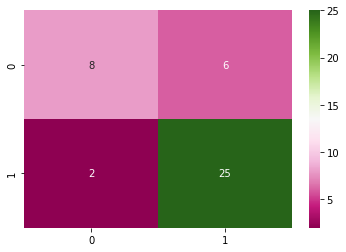

In [26]:
sns.heatmap(conf_mat,annot = True , cmap = 'PiYG')

- Precision - gives value for FP
- Recall - gives value for FN

In our data, Recall should be our major focus because,        
There is no problem if a guy is said that he's placed where he's actually not, whereas, There is a problem if a guy is said that he's not placed where he's actually placed

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.805
Precision: 0.806
Recall: 0.926
F1 Score: 0.862


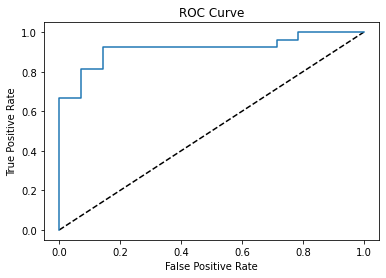

AUC =  0.9179894179894179


In [28]:
from sklearn.metrics import roc_curve
from sklearn import metrics

y_pred_prob = base_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

auc = metrics.roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC = ", auc)

## Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score

cross_val_model = SVC(kernel='linear') 

# metrics.get_scorer_names()   ---> for strings of scoring parameter

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="accuracy")
meanScore = scores.mean()
print("accuracy = ", meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="precision")
meanScore = scores.mean()
print("precision = ", meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="recall")
meanScore = scores.mean()
print("recall = ", meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="f1")
meanScore = scores.mean()
print('F1 score = ', meanScore )

scores = cross_val_score(cross_val_model, encoded_data, encoded_status, cv=5, scoring="roc_auc")
meanScore = scores.mean()
print('AUC ROC = ', meanScore )

accuracy =  0.8585365853658538
precision =  0.9004259259259259
recall =  0.9019704433497535
F1 score =  0.8996993567498854
AUC ROC =  0.9183844890741442


#### Base Model     

Accuracy: 0.829     
Precision: 0.833     
Recall: 0.926     
F1 Score: 0.877 

> Cross Validation is considerably increasing with all the scores except `recall`

## Balanced Model

In [30]:
from sklearn.svm import SVC  
balanced_model = SVC(kernel='linear')  
balanced_model.fit(os_data_X, os_data_y['y'])
y_pred = balanced_model.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 8,  6],
       [ 2, 25]])

<AxesSubplot:>

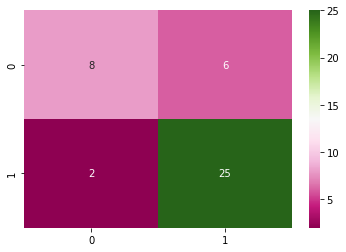

In [32]:
sns.heatmap(conf_mat, annot=True,cmap="PiYG")

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.805
Precision: 0.806
Recall: 0.926
F1 Score: 0.862


#### Base Model

Accuracy: 0.829       
Precision: 0.833      
Recall: 0.926      
F1 Score: 0.877  

Every scores except `recall` is affeced. Though we're more concerned only about recall, precision has a lower score even than the base model.

So, as of now, we'll proceed with base model.

### Feature Selection

#### Significance with *status*

- ['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p']
- ['workex', 'mba_t', 'degree_t', 'gender']
equal - ['ssc_b', 'hsc_b', 'hsc_s'] = 0.0

In [47]:
pd.set_option('display.max_columns', None)
encoded_data

,ssc_p,degree_p,mba_p,hsc_p,etest_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR
0,-0.048543,-1.167746,-0.600208,2.523936,-1.289390,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1
1,1.113716,1.580418,0.705618,1.213254,1.122781,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0
2,-0.237068,-0.321289,-0.774784,0.144640,0.242147,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0
3,-1.085433,-2.014204,-0.490225,-1.510522,-0.447045,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1
4,1.723596,0.990720,-1.176308,0.723947,1.911523,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.233430,1.597347,2.138883,1.592907,1.467377,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
201,-0.896907,0.807321,-1.504510,-0.682941,0.165570,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
202,-0.048543,0.948397,1.306158,0.041192,-0.983083,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0
203,0.611296,-1.167746,-0.350565,-0.062255,-0.140737,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [48]:
selec_data_X = encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p',
                             'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin', 'mba_t_Mkt&HR', 
                             'degree_t_Comm&Mgmt', 'degree_t_Others', 'degree_t_Sci&Tech', 'gender_F', 'gender_M']]
selec_data_X

,ssc_p,degree_p,mba_p,hsc_p,etest_p,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,gender_F,gender_M
0,-0.048543,-1.167746,-0.600208,2.523936,-1.289390,1,0,0,1,0,0,1,0,1
1,1.113716,1.580418,0.705618,1.213254,1.122781,0,1,1,0,0,0,1,0,1
2,-0.237068,-0.321289,-0.774784,0.144640,0.242147,1,0,1,0,1,0,0,0,1
3,-1.085433,-2.014204,-0.490225,-1.510522,-0.447045,1,0,0,1,0,0,1,0,1
4,1.723596,0.990720,-1.176308,0.723947,1.911523,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.233430,1.597347,2.138883,1.592907,1.467377,1,0,1,0,1,0,0,0,1
201,-0.896907,0.807321,-1.504510,-0.682941,0.165570,1,0,1,0,0,0,1,0,1
202,-0.048543,0.948397,1.306158,0.041192,-0.983083,0,1,1,0,1,0,0,0,1
203,0.611296,-1.167746,-0.350565,-0.062255,-0.140737,1,0,0,1,1,0,0,1,0


In [49]:
selec_data_y = encoded_status
selec_data_y

0      1
1      1
2      1
3      0
4      1
      ..
200    1
201    1
202    1
203    1
204    0
Name: status, Length: 205, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(selec_data_X, selec_data_y, test_size=0.20, random_state=42)

In [51]:
from sklearn.svm import SVC  
select_model = SVC(kernel='linear')  
select_model.fit(X_train_sel, y_train_sel)
y_pred_sel = select_model.predict(X_test_sel)

In [52]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test_sel, y_pred_sel)
conf_mat

array([[ 8,  6],
       [ 2, 25]])

<AxesSubplot:>

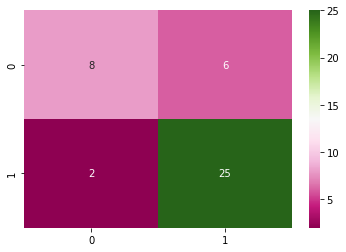

In [54]:
sns.heatmap(conf_mat, annot = True, cmap = 'PiYG')

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Accuracy: %.3f' % accuracy_score(y_test_sel, y_pred_sel))
print('Precision: %.3f' % precision_score(y_test_sel, y_pred_sel))
print('Recall: %.3f' % recall_score(y_test_sel, y_pred_sel))
print('F1 Score: %.3f' % f1_score(y_test_sel, y_pred_sel))

Accuracy: 0.805
Precision: 0.806
Recall: 0.926
F1 Score: 0.862


## Results of Feature Selection

#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender', 'etest_p', 'ssc_b', 'hsc_b', 'hsc_s']]       

    array([[ 8,  6],    
           [ 2, 25]]    
           
    Accuracy: 0.805    
    Precision: 0.806    
    Recall: 0.926    
    F1 Score: 0.862    
    
#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender', 'ssc_b', 'hsc_b', 'hsc_s']]      

    array([[ 7,  7],       
           [ 2, 25]]        
           
    Accuracy: 0.780      
    Precision: 0.781     
    Recall: 0.926      
    F1 Score: 0.847      
    
#### **encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender', 'etest_p']]**     

    array([[ 8,  6],      
           [ 2, 25]]       
           
    Accuracy: 0.805      
    Precision: 0.806     
    Recall: 0.926     
    F1 Score: 0.862      

#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t', 'gender']]      

    array([[ 7,  7],      
           [ 2, 25]]        
                
    Accuracy: 0.780       
    Precision: 0.781     
    Recall: 0.926     
    F1 Score: 0.847        
    
#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'workex', 'mba_t', 'degree_t', 'gender']]         

    array([[ 7,  7],      
           [ 2, 25]]      
              
    Accuracy: 0.780        
    Precision: 0.781     
    Recall: 0.926    
    F1 Score: 0.847           
    
#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'workex', 'mba_t', 'degree_t']]           

    array([[ 7,  7],      
           [ 2, 25]]        
              
    Accuracy: 0.780     
    Precision: 0.781     
    Recall: 0.926       
    F1 Score: 0.847     
#### encoded_data[['ssc_p', 'degree_p', 'mba_p', 'workex', 'mba_t', 'degree_t']]     

    array([[ 6,  8],      
           [ 2, 25]]      
              
    Accuracy: 0.756     
    Precision: 0.758   
    Recall: 0.926    
    F1 Score: 0.833

> Selection of features here are reducing the performance of the model. So, we the bold result, where we eliminated which has zero significance with status.

## Balanced Model with Feature Selection

In [57]:
os_data_X

,ssc_p,degree_p,mba_p,hsc_p,etest_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR
0,0.517033,-0.039137,1.018108,0.661878,-0.140737,0,1,1,0,1,0,0,0,1,0,0,1,0,1,1,0
1,-0.237068,0.384092,-1.261850,0.144640,-1.388940,0,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1
2,-1.462483,-1.167746,-0.287718,-1.820865,-0.753352,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1
3,-1.273958,-0.462365,-0.483242,1.592907,-1.672274,0,1,1,0,0,1,0,1,0,0,0,1,1,0,1,0
4,1.271135,-0.321289,0.056196,0.144640,1.620531,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1.195353,0.277019,0.770068,1.001871,1.730468,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0
228,-1.326257,-1.865760,0.317363,-0.920931,-0.008897,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
229,-1.220862,-0.382900,0.284748,0.718864,-1.240936,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
230,-0.899266,-1.130896,0.432828,-1.103700,-1.077967,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1


In [58]:
os_data_X = os_data_X[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin', 'mba_t_Mkt&HR', 'degree_t_Comm&Mgmt', 'degree_t_Others', 'degree_t_Sci&Tech', 'gender_F', 'gender_M']]
os_data_X

,ssc_p,degree_p,mba_p,hsc_p,etest_p,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,gender_F,gender_M
0,0.517033,-0.039137,1.018108,0.661878,-0.140737,0,1,1,0,0,0,1,0,1
1,-0.237068,0.384092,-1.261850,0.144640,-1.388940,1,0,0,1,1,0,0,0,1
2,-1.462483,-1.167746,-0.287718,-1.820865,-0.753352,1,0,0,1,1,0,0,0,1
3,-1.273958,-0.462365,-0.483242,1.592907,-1.672274,1,0,1,0,0,0,1,0,1
4,1.271135,-0.321289,0.056196,0.144640,1.620531,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,-1.195353,0.277019,0.770068,1.001871,1.730468,1,0,1,0,1,0,0,0,0
228,-1.326257,-1.865760,0.317363,-0.920931,-0.008897,0,0,0,0,1,0,0,0,0
229,-1.220862,-0.382900,0.284748,0.718864,-1.240936,1,0,1,0,0,0,0,0,0
230,-0.899266,-1.130896,0.432828,-1.103700,-1.077967,1,0,0,1,1,0,0,0,0


In [59]:
X_test = X_test[['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin', 'mba_t_Mkt&HR', 'degree_t_Comm&Mgmt', 'degree_t_Others', 'degree_t_Sci&Tech', 'gender_F', 'gender_M']]
X_test.head()

,ssc_p,degree_p,mba_p,hsc_p,etest_p,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,gender_F,gender_M
15,-0.237068,0.384092,0.422805,0.868773,0.012417,0,1,1,0,1,0,0,1,0
9,-0.896907,-0.744518,-1.750661,0.351535,-1.365967,1,0,1,0,1,0,0,0,1
100,0.517033,0.948397,0.627059,1.179116,1.007916,0,1,0,1,0,0,1,0,1
132,1.365397,0.948397,1.664038,-0.269151,1.850261,0,1,1,0,0,0,1,1,0
68,0.705559,0.666244,0.820838,0.381535,1.773685,1,0,1,0,1,0,0,0,1


In [60]:
from sklearn.svm import SVC  
balanced_model = SVC(kernel='linear')  
balanced_model.fit(os_data_X, os_data_y['y'])
y_pred = balanced_model.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[ 7,  7],
       [ 2, 25]])

<AxesSubplot:>

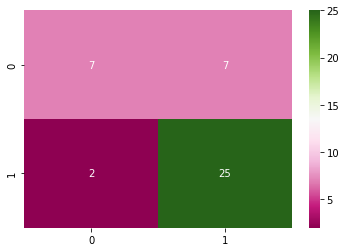

In [62]:
sns.heatmap( conf_mat, annot = True, cmap = 'PiYG')

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.780
Precision: 0.781
Recall: 0.926
F1 Score: 0.847


#### Base Model with Feature selection

Accuracy: 0.878    
Precision: 0.867     
Recall: 0.963    
F1 Score: 0.912 

> Even after many tries, there are no good results as like with base model and feature selection

- As of now, the above one is the best result.